In [ ]:
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image, ImageDraw

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("redstonehero/cetusmix_v4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker = None


In [ ]:
pipe = pipe.to("cuda")
pipe.safety_checker = None

  0%|          | 0/100 [00:00<?, ?it/s]

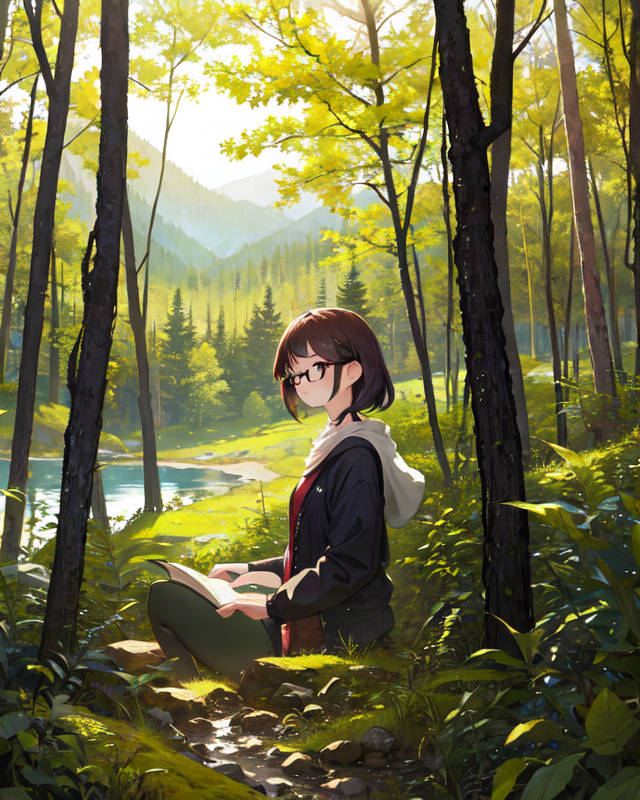

In [ ]:
prompt = "a girl with glasses in the forest, landscape, scenery, 8K, masterpiece, ultradetailed"
h=800
w=640
steps=100
guidance=9
neg = "easynegative, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"
# neg = ""
image = pipe(prompt, height=h, width=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

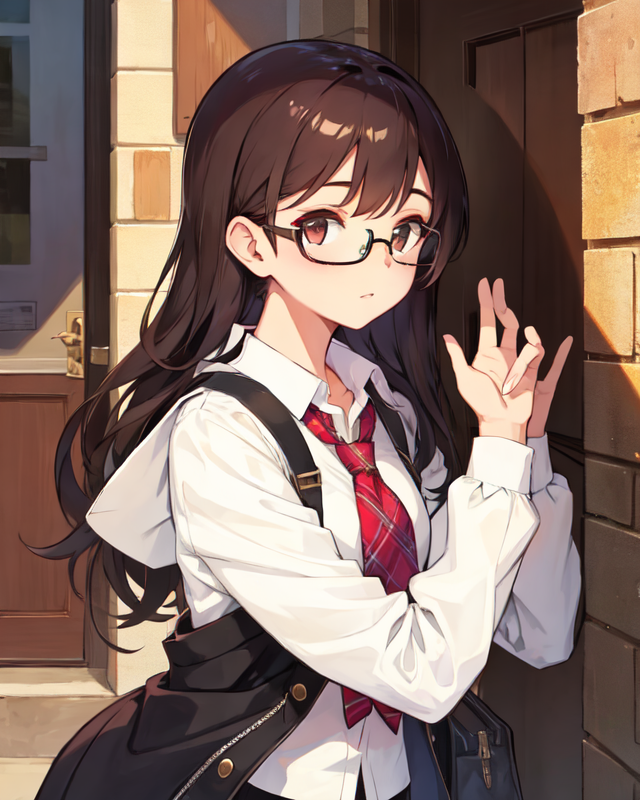

In [ ]:
prompt = "a girl with glasses "
h=800
w=640
steps=50
guidance=9
neg = "easynegative, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"
image = pipe(prompt, height=h, width=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

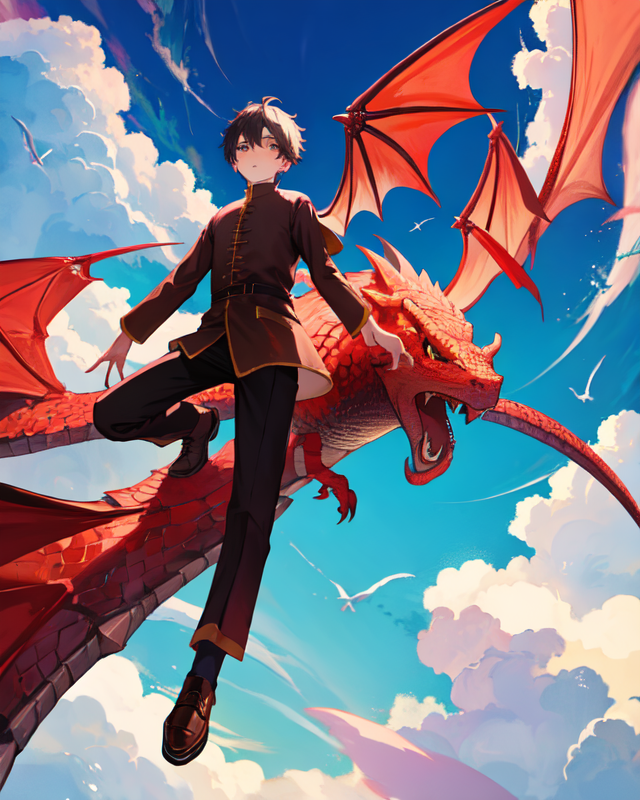

In [ ]:
prompt = "a boy with his dragon flying in the sky , 8k"
h=800
w=640
steps=50
guidance=9
neg = "easynegative, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"
image = pipe(prompt, height=h, width=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images[0]
image

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
prompt = "a girl with brown hair wearing a glsses "
h=800
w=800
steps=25
guidance=7
lora_weight=0
num_images=9
denoising_strength=0.4
neg = "easynegative, human, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"

images = pipe(prompt, strength=denoising_strength, num_images_per_prompt=num_images, cross_attention_kwargs={"scale": lora_weight}, height=h, width=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images
image_grid(images, rows=3, cols=3)

In [ ]:
import os
directory = "image_directory"
os.makedirs(directory, exist_ok=True)

for i, image in enumerate(images):
    image_path = os.path.join(directory, f"image_{i}.jpg")
    image.save(image_path, "JPEG")
    print(f"Image {i} saved as {image_path}")

Image 0 saved as image_directory/image_0.jpg
Image 1 saved as image_directory/image_1.jpg
Image 2 saved as image_directory/image_2.jpg
Image 3 saved as image_directory/image_3.jpg
Image 4 saved as image_directory/image_4.jpg
Image 5 saved as image_directory/image_5.jpg
Image 6 saved as image_directory/image_6.jpg
Image 7 saved as image_directory/image_7.jpg
Image 8 saved as image_directory/image_8.jpg


In [ ]:
def save_images(images,name ,directory, file_format="PNG"):
    os.makedirs(directory, exist_ok=True)
    for i, image in enumerate(images):
        image_path = os.path.join(directory, f"{name}_{i}.{file_format.lower()}")
        image.save(image_path, file_format)
        print(f"Image {name}_{i} saved as {image_path}")

In [ ]:
def save_image(image, file_path, file_format="PNG"):
    image.save(file_path, file_format)
    print(f"Image saved as {file_path}")


  0%|          | 0/25 [00:00<?, ?it/s]

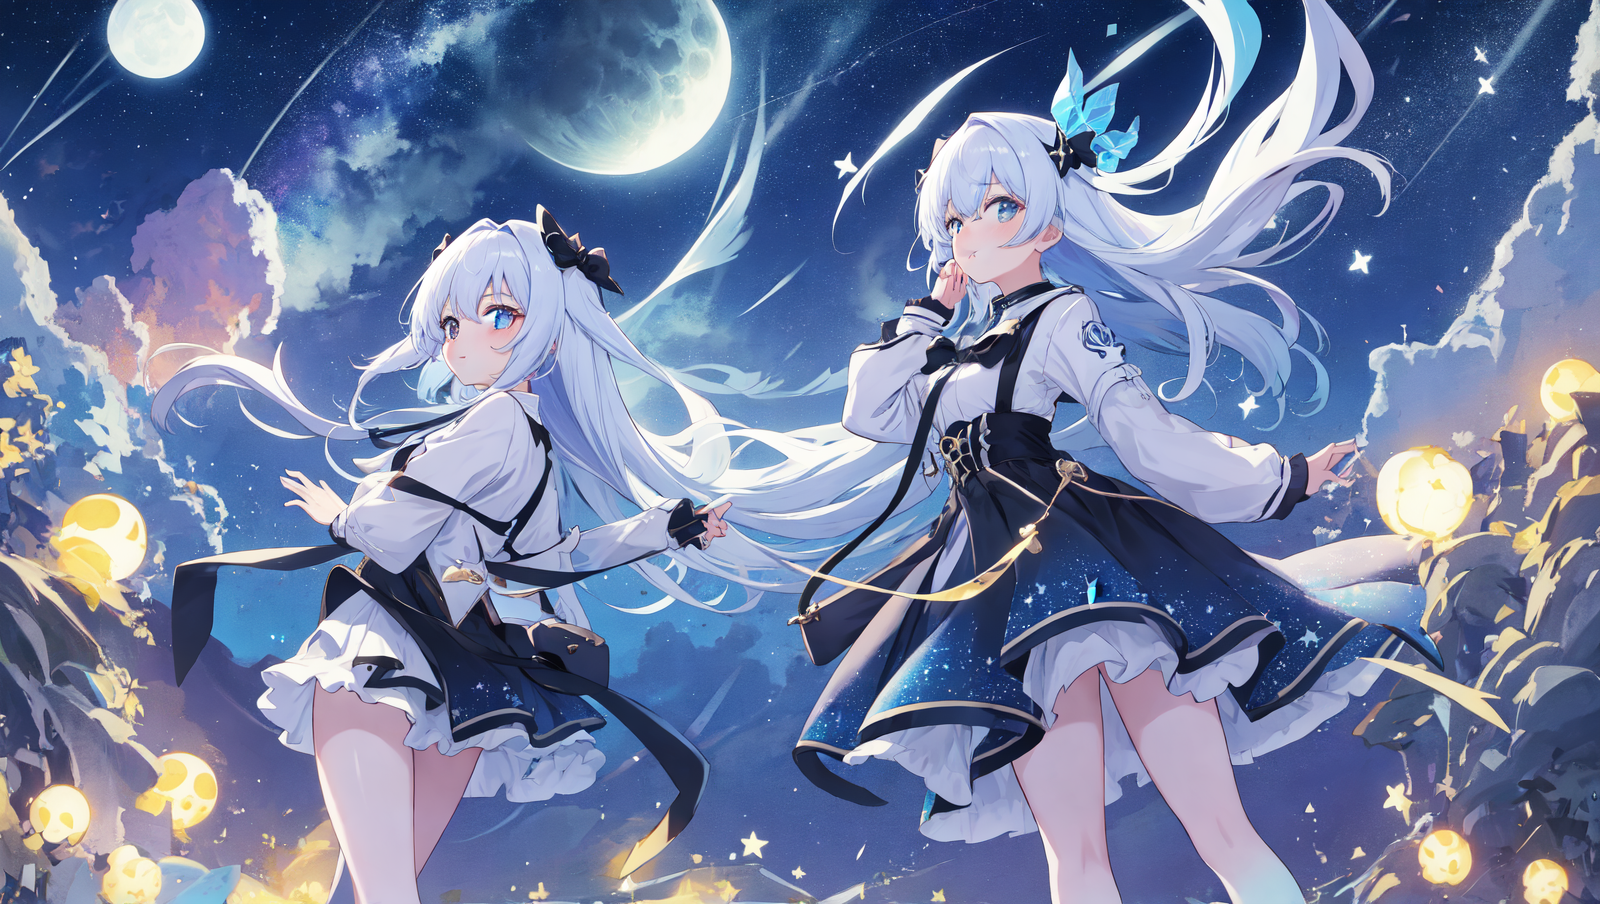

In [ ]:
prompt = "a girl wearing glasses looking to the moon and stars in blue night , 8k  "
h=800
w=720
steps=25
guidance=7
lora_weight=0
num_images=9
denoising_strength=0.4
neg = "easynegative, human, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"

image = pipe(prompt, height=h, width=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images[0]
image

In [ ]:
file_path = 'lol'
save_image(image, file_path, file_format="PNG")

Image saved as lol


In [ ]:
save_images(images , 'M.L' , '/content/image_directory' , 'PNG')

Image M.L_0 saved as /content/image_directory/image_0.png
Image M.L_1 saved as /content/image_directory/image_1.png
Image M.L_2 saved as /content/image_directory/image_2.png
Image M.L_3 saved as /content/image_directory/image_3.png
Image M.L_4 saved as /content/image_directory/image_4.png
Image M.L_5 saved as /content/image_directory/image_5.png
Image M.L_6 saved as /content/image_directory/image_6.png
Image M.L_7 saved as /content/image_directory/image_7.png
Image M.L_8 saved as /content/image_directory/image_8.png


In [ ]:
image_grid(images, rows=3, cols=3)

In [ ]:
def generate_text2img (prompt:str, height = 800 , width = 800):
  steps=50
  guidance=7
  lora_weight=0
  num_images=9
  denoising_strength=0.4
  neg = "easynegative, human, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"
  image = pipe(prompt, height= height, width= width, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images[0]
  return image


  0%|          | 0/50 [00:00<?, ?it/s]

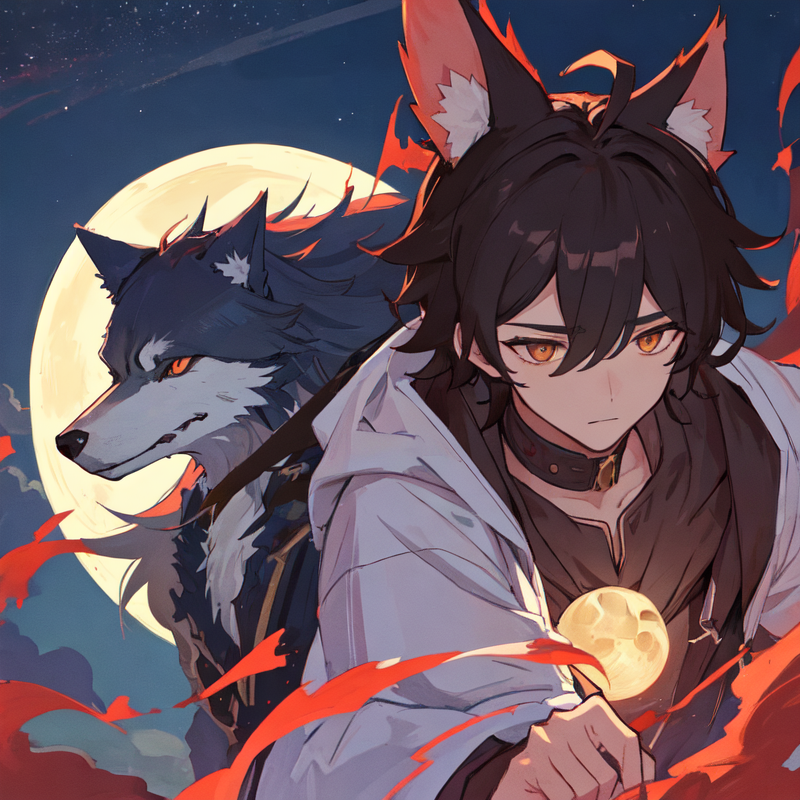

In [ ]:
generate_image('aboy with his wolf in night day and complete moon')